In [36]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings

import derivative

In [37]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [38]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math   

HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

figsize(8,4)

In [39]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [40]:
nm = 1e-9
um = 1e-6
c = 3e8

In [41]:
emeApi = lumapi.MODE()

In [42]:
emeApi.switchtolayout()
emeApi.deleteall()

In [43]:
materialClad = "SiO2 (Glass) - Palik"
materialSi = "Si (Silicon) - Palik"

In [44]:
#slab data
width = 450*nm
height = 220*nm
#length = 155.287078587044064*um
length = 5*um

In [45]:
emeApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
emeApi.set('name', dev_layer)

In [46]:
emeApi.addrect()
emeApi.addtogroup(dev_layer)
emeApi.set('name','slab')
emeApi.set('x',0)
emeApi.set('x span', length)
emeApi.set('y',0)
emeApi.set('y span', width)
emeApi.set('z',height/2)
emeApi.set('z span', height)
emeApi.set('material', materialSi)

FDE settings - to get neff vs wavelength

In [47]:
emeApi.addfde()
bound_x_offset = 0.5*um
bound_y_offset = 2*um
bound_z_offset = 0.5*um



In [48]:
emeApi.set('solver type', '2D X normal')
emeApi.set('background material', 'SiO2 (Glass) - Palik')
emeApi.set('x',0)
emeApi.set('y', 0)
emeApi.set('y span', width + 2*bound_y_offset)
emeApi.set('z', height/2)

emeApi.set('mesh cells y', 100)
emeApi.set('mesh cells z', 100)
emeApi.set('y min bc', 'Metal')
emeApi.set('y max bc', 'Metal')
emeApi.set('z min bc', 'Metal')
emeApi.set('z max bc', 'Metal')

In [49]:
emeApi.switchtolayout()
emeApi.set('track selected mode', 1)
emeApi.set('detailed dispersion calculation', 1)
emeApi.set('number of points', 100)
emeApi.set('wavelength', 1.6*um)
emeApi.set('stop wavelength', 1.5*um)
emeApi.findmodes()
emeApi.selectmode(1)

neff_mode1 = []

emeApi.frequencysweep()
emeApi.savedata('waveguide')
neff_sweep = emeApi.real(emeApi.getdata('FDE::data::frequencysweep', 'neff'))

frequency_sweep = emeApi.getdata('FDE::data::frequencysweep', 'f')

wavelength_sweep = c/frequency_sweep

wavelength_values = np.linspace(1.5*um, 1.6*um, 6)

neff_mode1.append(emeApi.real(emeApi.getdata('mode1', 'neff')))


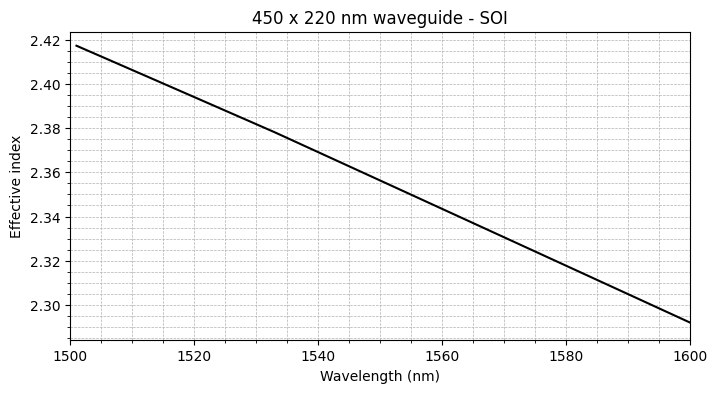

In [91]:
plt.minorticks_on()
plt.grid()
plt.plot(wavelength_sweep/nm, neff_sweep, 'black', lw=1.5)
plt.title('450 x 220 nm waveguide - SOI')
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Effective index')
plt.xlim(1500, 1600)
plt.savefig('neff.png')

Group index calculation

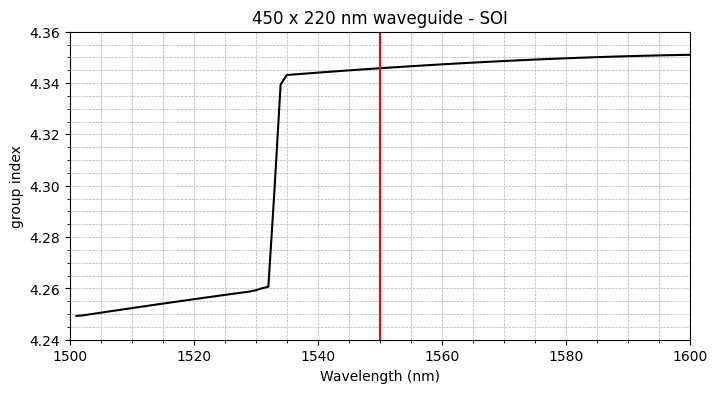

In [95]:
#neff(lambda)
lambda0 = 1550*nm

neff_lambda = np.column_stack((wavelength_sweep, neff_sweep))
derivative_neff = derivative.derivative(neff_lambda)
ng =  neff_sweep.flatten()- (derivative_neff[:,1]*wavelength_sweep.flatten())

plt.grid()
plt.minorticks_on()
plt.plot(derivative_neff[:,0]/nm, ng, 'black', lw=1.5)
plt.vlines(1550,ymin=4,ymax=5, color='r')
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('450 x 220 nm waveguide - SOI')
plt.xlabel('Wavelength (nm)')
plt.ylabel('group index')
plt.xlim(1500, 1600)
plt.ylim(4.24, 4.36)
plt.savefig('group_index.png')

PLOT FSR

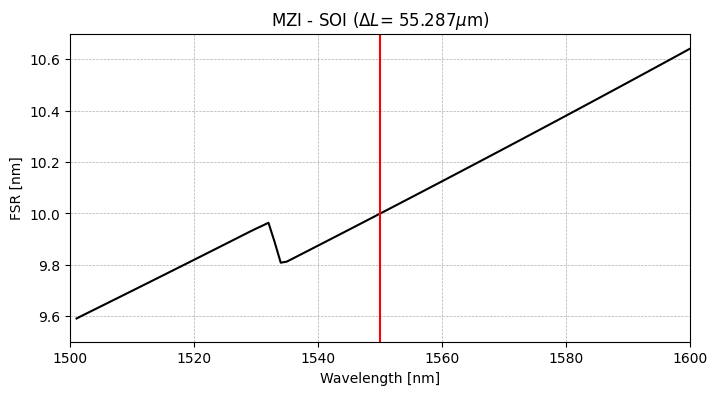

In [92]:
delta = 55.287078587044064
fsr = (wavelength_sweep.flatten())**2/(ng*delta*um)

plt.title(r'MZI - SOI ($\Delta L$= 55.287$\mu$m)')
plt.plot(wavelength_sweep/nm, fsr/nm, 'black', lw=1.5)
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.vlines(1550,ymin=9,ymax=11, color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim(1500, 1600)
plt.ylim(9.5, 10.7)
plt.savefig('FSR55287')

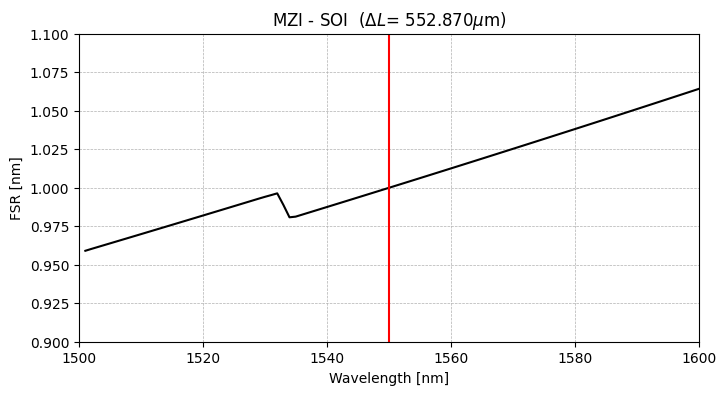

In [93]:
delta = 552.8707858704406
fsr = (wavelength_sweep.flatten())**2/(ng*delta*um)

plt.title(r'MZI - SOI  ($\Delta L$= 552.870$\mu$m)')
plt.plot(wavelength_sweep/nm, fsr/nm, 'black', lw=1.5)
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.vlines(1550,ymin=0,ymax=2, color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim(1500, 1600)
plt.ylim(0.9, 1.1)
plt.savefig('FSR555')

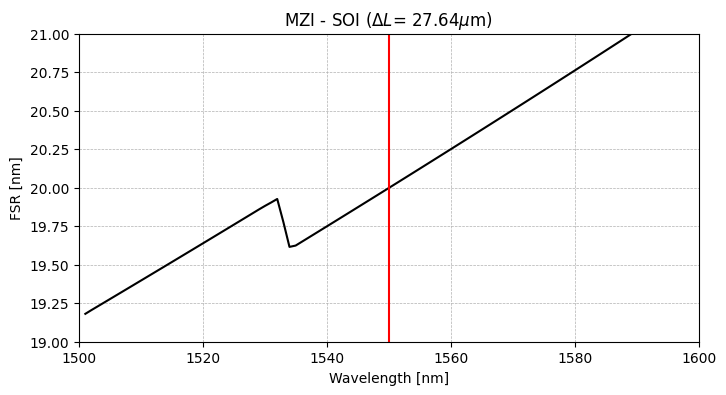

In [94]:
delta = 27.643539293522032
fsr = (wavelength_sweep.flatten())**2/(ng*delta*um)

plt.title(r'MZI - SOI ($\Delta L$= 27.64$\mu$m)')
plt.plot(wavelength_sweep/nm, fsr/nm, 'black', lw=1.5)
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.vlines(1550,ymin=0,ymax=25, color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim(1500, 1600)
plt.ylim(19, 21)
plt.savefig('FSR27')